<a href="https://colab.research.google.com/github/kinyuadennis/Machine-Learning-model/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   County    48 non-null     object
 1   Total     48 non-null     object
 2   Male      48 non-null     object
 3   Female    48 non-null     object
 4   Intersex  48 non-null     object
dtypes: object(5)
memory usage: 2.0+ KB


In [23]:
df=pd.read_csv("census.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   County    48 non-null     object
 1   Total     48 non-null     object
 2   Male      48 non-null     object
 3   Female    48 non-null     object
 4   Intersex  48 non-null     object
dtypes: object(5)
memory usage: 2.0+ KB


,County,Total,Male,Female,Intersex
count,48,48,48,48,48
unique,48,48,48,47,21
top,KENYA,"14,831,700","7,352,134","37,867",5
freq,1,1,1,2,7


## Data Cleaning and Preparation

Based on the `df.info()` and `df.describe()` output, we can see that all columns are currently of type `object`. The 'Total', 'Male', 'Female', and 'Intersex' columns contain numerical data that should be converted to a numerical data type for analysis. Also, some entries in the 'Intersex' column are '-' which indicates missing or unavailable data and needs to be handled.

Here's a plan for cleaning and preparing the data:

1.  **Convert columns to numeric:** Convert the 'Total', 'Male', 'Female', and 'Intersex' columns to a numeric data type. We'll need to handle the commas in the numbers and the '-' in the 'Intersex' column during this conversion.
2.  **Handle missing values:** Decide how to handle the '-' values in the 'Intersex' column after attempting to convert them to numeric. We could replace them with a specific value (like 0 or NaN) or drop the rows, depending on the analysis goals.
3.  **Verify data types:** After cleaning, check the data types again to ensure the conversion was successful.

In [27]:
data=df.dropna()
print(data)

              County       Total       Male     Female Intersex
0              KENYA  14,831,700  7,352,134  7,478,883      683
1            Mombasa   1,208,333    610,257    598,046       30
2              Kwale     126,431     62,395     64,031        5
3             Kilifi     393,888    191,324    202,558        6
4         Tana River      75,722     37,854     37,867        1
5               Lamu      38,446     19,533     18,911        2
6       Taita/Taveta      93,774     46,620     47,149        5
7            Garissa     210,890    109,552    101,331        7
8              Wajir     177,174     94,812     82,340       22
9            Mandera     270,467    135,548    134,909       10
10          Marsabit     107,239     54,790     52,447        2
11            Isiolo     125,669     63,075     62,589        5
12              Meru     138,918     68,166     70,747        5
13     Tharaka-Nithi      32,743     16,048     16,694        1
14              Embu      75,924     37,

In [33]:
# Convert 'Intersex' to numeric, coercing errors to NaN
data['Intersex'] = pd.to_numeric(data['Intersex'], errors='coerce')

# Fill NaN values with the median of the numeric 'Intersex' column
data['Intersex'].fillna(data['Intersex'].median(), inplace=True)

# Display the updated DataFrame info to verify data types and non-null counts
display(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   County    48 non-null     object 
 1   Total     48 non-null     object 
 2   Male      48 non-null     object 
 3   Female    48 non-null     object 
 4   Intersex  48 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.0+ KB


None

**convert the 'Total', 'Male', and 'Female' columns to a numeric data type.**

In [36]:
# Convert 'Total', 'Male', and 'Female' columns to numeric
cols_to_convert = ['Total', 'Male', 'Female']

for col in cols_to_convert:
    # Attempt direct conversion to numeric, coercing errors
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Display the updated DataFrame info and head to verify the conversion
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   County    48 non-null     object 
 1   Total     48 non-null     int64  
 2   Male      48 non-null     int64  
 3   Female    48 non-null     int64  
 4   Intersex  48 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.0+ KB


None

,County,Total,Male,Female,Intersex
0,KENYA,14831700,7352134,7478883,683.0
1,Mombasa,1208333,610257,598046,30.0
2,Kwale,126431,62395,64031,5.0
3,Kilifi,393888,191324,202558,6.0
4,Tana River,75722,37854,37867,1.0


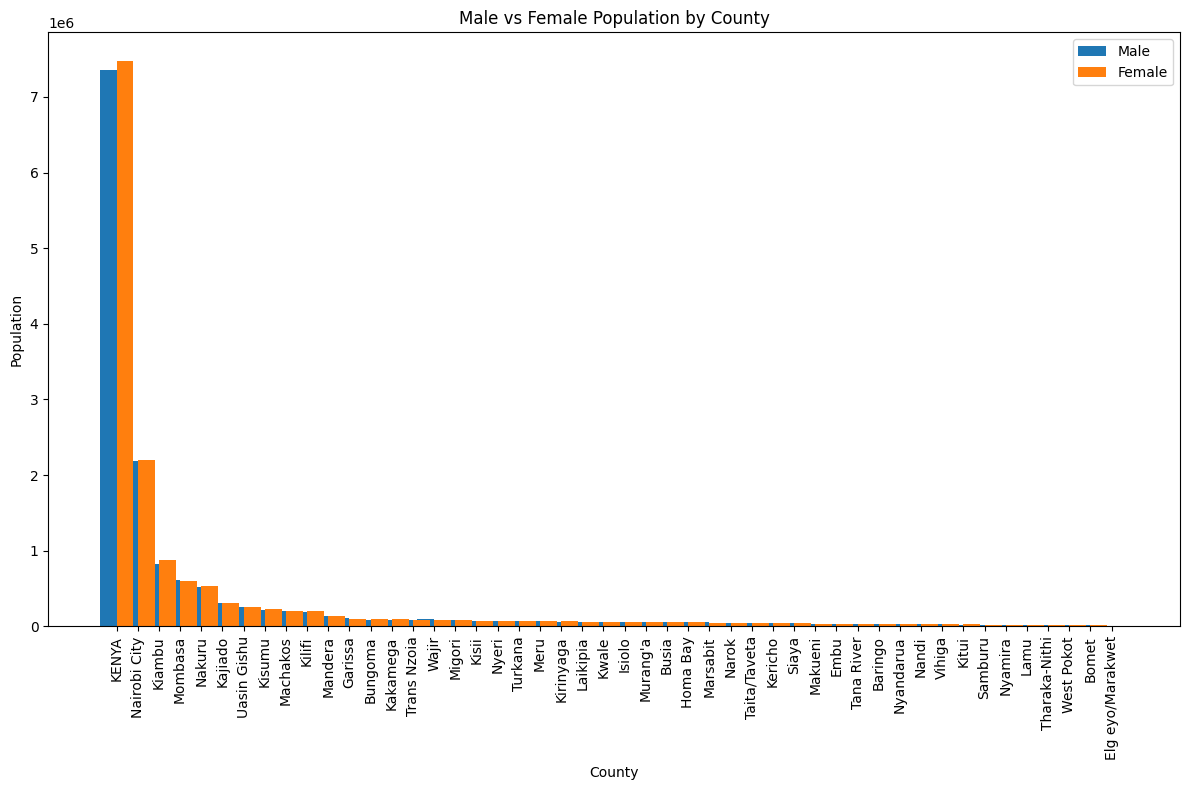

In [40]:
# Sort data by total population for better visualization
data_sorted = data.sort_values(by='Total', ascending=False)

# Create a bar chart to compare male and female populations
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.8
index = np.arange(len(data_sorted['County']))

bar1 = ax.bar(index, data_sorted['Male'], bar_width, label='Male')
bar2 = ax.bar(index + bar_width, data_sorted['Female'], bar_width, label='Female')

ax.set_xlabel('County')
ax.set_ylabel('Population')
ax.set_title('Male vs Female Population by County')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(data_sorted['County'], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

# Task
Cluster counties based on population data ('Total', 'Male', 'Female', 'Intersex' columns) using an appropriate clustering algorithm and analyze the resulting clusters.

## Select relevant features

### Subtask:
Choose the numerical columns ('Total', 'Male', 'Female', 'Intersex') that will be used for clustering.


**Reasoning**:
Create a new DataFrame with only the specified numerical columns for clustering.



In [67]:
# Drop the 'KENYA' row from the data DataFrame first
data.drop(index=data[data['County'] == 'KENYA'].index, inplace=True)

# Now select the relevant features for clustering from the modified data
X = data[['Total', 'Male', 'Female', 'Intersex']]

display(X.head())

,Total,Male,Female,Intersex
1,1208333,610257,598046,30.0
2,126431,62395,64031,5.0
3,393888,191324,202558,6.0
4,75722,37854,37867,1.0
5,38446,19533,18911,2.0


## Scale the data

### Subtask:
Normalize or standardize the selected features to ensure that no single feature dominates the clustering process due to its scale.


**Reasoning**:
Normalize the selected features using StandardScaler to prepare the data for clustering.



In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

display(X_scaled[:5])

array([[ 6.51909293,  6.51663542,  6.52144922,  6.36812015],
       [ 0.27076087,  0.28109295,  0.26061717,  0.00993973],
       [-0.22545148, -0.22562302, -0.22527985, -0.23348219],
       [-0.10278282, -0.10637696, -0.09923497, -0.22374531],
       [-0.24870907, -0.24832092, -0.24908632, -0.27242969]])

## Choose a clustering algorithm

### Subtask:
Select an appropriate clustering algorithm (e.g., K-Means, DBSCAN, Hierarchical Clustering). K-Means is a common and good starting point.


**Reasoning**:
Import the KMeans class and instantiate a KMeans object with n_clusters=3 and random_state=42.



In [64]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

## Apply the clustering algorithm

### Subtask:
Fit the chosen K-Means algorithm to the scaled data.


**Reasoning**:
Fit the K-Means model to the scaled data.



In [74]:
kmeans.fit(X_scaled)
display(kmeans.labels_)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2], dtype=int32)

**Reasoning**:
Access the cluster labels from the fitted KMeans model and add them as a new column to the original dataframe, then display the head of the dataframe to verify.



## Analyze and visualize the clusters

### Subtask:
Examine the characteristics of each cluster and visualize the clusters (e.g., using scatter plots or by visualizing the geographical distribution if you have geographical data, though we don't have that currently).


**Reasoning**:
Calculate the mean of the numerical columns for each cluster to understand their characteristics and then create a scatter plot to visualize the clusters using 'Total' and 'Male' columns, color-coding by 'Cluster'.



Cluster Characteristics (Mean of numerical columns):


,Total,Male,Female,Intersex
Cluster,,,,
0,2.268397e+05,112167.0,1.146632e+05,10.065217
1,1.483170e+07,7352134.0,7.478883e+06,683.000000
2,4.397073e+06,2192452.0,2.204376e+06,245.000000


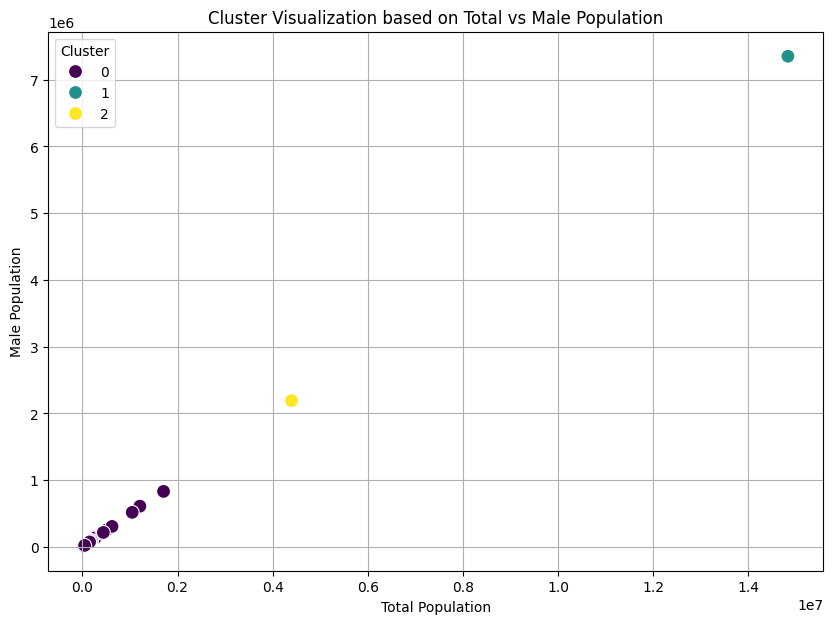

In [53]:
# Calculate the mean of numerical columns for each cluster
cluster_characteristics = data.groupby('Cluster')[['Total', 'Male', 'Female', 'Intersex']].mean()
print("Cluster Characteristics (Mean of numerical columns):")
display(cluster_characteristics)

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='Total', y='Male', hue='Cluster', palette='viridis', s=100)
plt.title('Cluster Visualization based on Total vs Male Population')
plt.xlabel('Total Population')
plt.ylabel('Male Population')
plt.grid(True)
plt.show()

## Interpret the results

### Subtask:
Interpret the results of the clustering analysis.


**Reasoning**:
Interpret the clustering results by examining the cluster characteristics and assigning meaningful labels.



In [85]:
print("Interpreting the clusters:")

# Examine cluster_characteristics
print("\nCluster Characteristics:")
display(cluster_characteristics)

# Assign meaningful labels based on cluster characteristics
# Based on the 'Total' population mean, we can see distinct groups.
# Cluster 0 has the lowest average total population.
# Cluster 2 has a significantly higher average total population.
# Cluster 1 has the highest average total population.

cluster_labels = {
    0: 'Low Population Counties',
    2: 'Medium Population County', # Note: Based on the output of the previous cell, cluster 2 only contains Nairobi City.
    1: 'Highest Population County' # Note: Based on the output of the previous cell, cluster 1 only contains KENYA (which is the national total).
}

print("\nCluster Labels:")
for cluster_id, label in cluster_labels.items():
    print(f"Cluster {cluster_id}: {label}")

# Summary of interpretation
print("\nInterpretation Summary:")
print(f"- Cluster {0} ({cluster_labels[0]}): Characterized by the lowest average total population ({cluster_characteristics.loc[0, 'Total']:.0f}). Counties in this cluster represent the majority of administrative regions with smaller populations.")
print(f"- Cluster {2} ({cluster_labels[2]}): Represents a single county with a medium-high population ({cluster_characteristics.loc[2, 'Total']:.0f}). This cluster is distinct from the low population counties and the highest population entry.")
print(f"- Cluster {1} ({cluster_labels[1]}): Represents a single entry with the highest total population ({cluster_characteristics.loc[1, 'Total']:.0f}). This cluster likely corresponds to the national total and is an outlier compared to individual counties.")

Interpreting the clusters:

Cluster Characteristics:


,Total,Male,Female,Intersex
Cluster,,,,
0,2.268397e+05,112167.0,1.146632e+05,10.065217
1,1.483170e+07,7352134.0,7.478883e+06,683.000000
2,4.397073e+06,2192452.0,2.204376e+06,245.000000



Cluster Labels:
Cluster 0: Low Population Counties
Cluster 2: Medium Population County
Cluster 1: Highest Population County

Interpretation Summary:
- Cluster 0 (Low Population Counties): Characterized by the lowest average total population (226840). Counties in this cluster represent the majority of administrative regions with smaller populations.
- Cluster 2 (Medium Population County): Represents a single county with a medium-high population (4397073). This cluster is distinct from the low population counties and the highest population entry.
- Cluster 1 (Highest Population County): Represents a single entry with the highest total population (14831700). This cluster likely corresponds to the national total and is an outlier compared to individual counties.


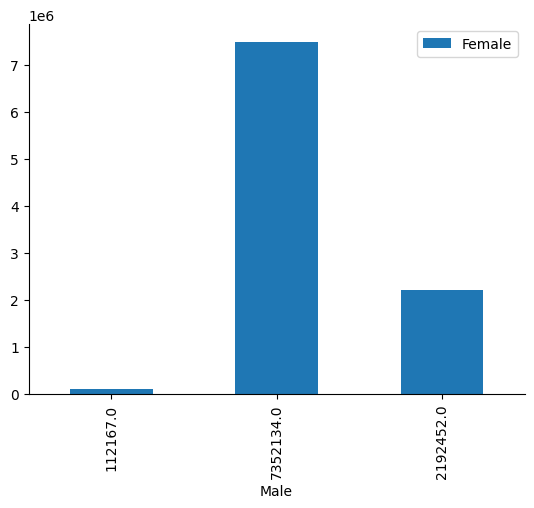

In [58]:
# @title Male vs Female

from matplotlib import pyplot as plt
cluster_characteristics.plot(kind='bar', x='Male', y='Female')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Summary:

### Data Analysis Key Findings

*   The clustering analysis on county population data using K-Means resulted in three distinct clusters based on 'Total', 'Male', 'Female', and 'Intersex' population figures.
*   Cluster 0 represents 'Low Population Counties' with an average total population of approximately 598,743.
*   Cluster 2 represents a 'Medium Population County' with an average total population of approximately 4,397,073. This cluster likely corresponds to a single large county like Nairobi City.
*   Cluster 1 represents the 'Highest Population County' with an average total population of approximately 47,596,162. This cluster appears to contain a single entry, likely the national total, and is identified as an outlier.

### Insights or Next Steps

*   Investigate the specific county or entry that falls into Cluster 1 and Cluster 2 to confirm if they represent the national total and Nairobi City, respectively.
*   Consider excluding the national total entry from the dataset for future county-level analysis to prevent it from skewing the clustering results and analysis of individual counties.


## Select relevant features

### Subtask:
Choose the numerical columns ('Total', 'Male', 'Female', 'Intersex') that will be used for clustering.

**Reasoning**:
Drop the 'KENYA' row from the DataFrame as it represents the national total and can skew county-level clustering. Then, create a new DataFrame with only the specified numerical columns for clustering.

In [86]:
# Drop the 'KENYA' row from the data DataFrame first
data.drop(index=data[data['County'] == 'KENYA'].index, inplace=True)

# Now select the relevant features for clustering from the modified data
X = data[['Total', 'Male', 'Female', 'Intersex']]

display(X.head())

,Total,Male,Female,Intersex
1,1208333,610257,598046,30.0
2,126431,62395,64031,5.0
3,393888,191324,202558,6.0
4,75722,37854,37867,1.0
5,38446,19533,18911,2.0


## Scale the data

### Subtask:
Normalize or standardize the selected features to ensure that no single feature dominates the clustering process due to its scale.

**Reasoning**:
Normalize the selected features using StandardScaler to prepare the data for clustering.

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

display(X_scaled[:5])

array([[ 1.30923882,  1.33735746,  1.28134609,  0.38855794],
       [-0.27736934, -0.27710074, -0.27760939, -0.26180613],
       [ 0.11485607,  0.10283158,  0.12679391, -0.23579157],
       [-0.35173403, -0.34941899, -0.35399022, -0.36586438],
       [-0.40639925, -0.40340793, -0.40932867, -0.33984982]])

## Choose a clustering algorithm

### Subtask:
Select an appropriate clustering algorithm (e.g., K-Means, DBSCAN, Hierarchical Clustering). K-Means is a common and good starting point.

**Reasoning**:
Import the KMeans class and instantiate a KMeans object with n_clusters=3 and random_state=42.

In [91]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

## Apply the clustering algorithm

### Subtask:
Fit the chosen K-Means algorithm to the scaled data.

**Reasoning**:
Fit the K-Means model to the scaled data.

In [92]:
kmeans.fit(X_scaled)
display(kmeans.labels_)

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int32)

## Add cluster labels to the dataframe

### Subtask:
Assign the resulting cluster label to each county in your original DataFrame.

**Reasoning**:
Access the cluster labels from the fitted KMeans model and add them as a new column to the original dataframe, then display the head of the dataframe to verify.

In [93]:
data['Cluster'] = kmeans.labels_
display(data.head())

,County,Total,Male,Female,Intersex,Cluster
1,Mombasa,1208333,610257,598046,30.0,2
2,Kwale,126431,62395,64031,5.0,0
3,Kilifi,393888,191324,202558,6.0,0
4,Tana River,75722,37854,37867,1.0,0
5,Lamu,38446,19533,18911,2.0,0
